In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data=pd.read_csv("fraudTrain.csv")
print(data.head())
test_data=pd.read_csv("fraudTest.csv")
print(test_data.columns)

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [3]:
print(data.columns)

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [12]:
data.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year
data['hour'] = data['trans_date_trans_time'].dt.hour
data['dayofweek'] = data['trans_date_trans_time'].dt.dayofweek
data['is_night'] = data['hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek,is_night
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,31,0,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0,41,0,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,57,0,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0,52,0,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,33,0,1,1


In [13]:
test_data.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

test_data['age'] = test_data['trans_date_trans_time'].dt.year - test_data['dob'].dt.year
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['dayofweek'] = test_data['trans_date_trans_time'].dt.dayofweek
test_data['is_night'] = test_data['hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)
test_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,age,hour,dayofweek,is_night
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0,52,12,6,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0,30,12,6,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0,50,12,6,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0,33,12,6,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0,65,12,6,0


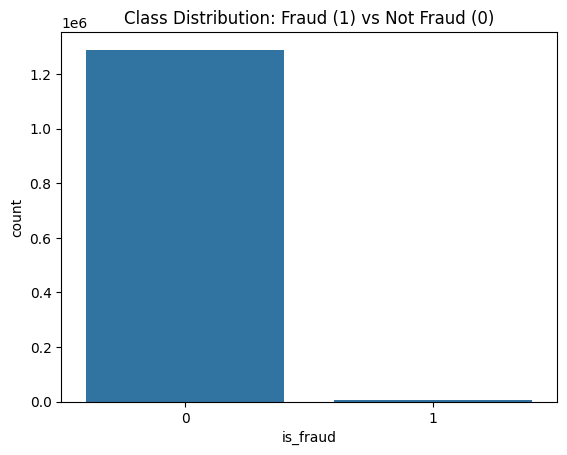

In [24]:
sns.countplot(data=data, x='is_fraud')
plt.title("Class Distribution: Fraud (1) vs Not Fraud (0)")
plt.show()

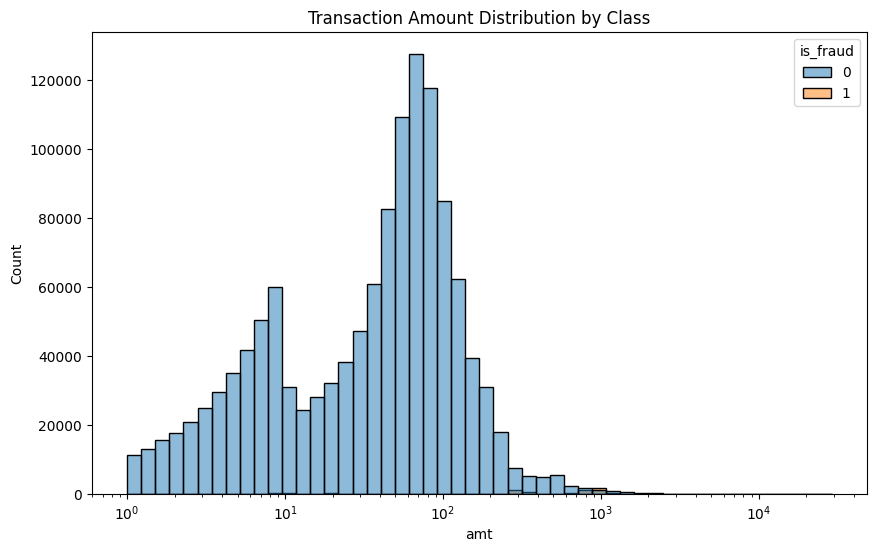

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='amt', bins=50, hue='is_fraud', log_scale=True)
plt.title("Transaction Amount Distribution by Class")
plt.show()


C:\Users\shanm\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


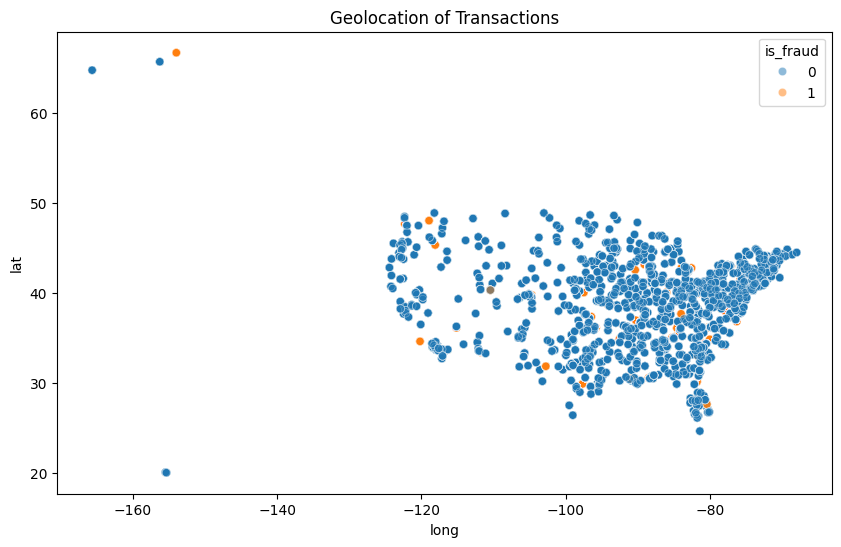

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='long', y='lat', hue='is_fraud', alpha=0.5)
plt.title("Geolocation of Transactions")
plt.show()


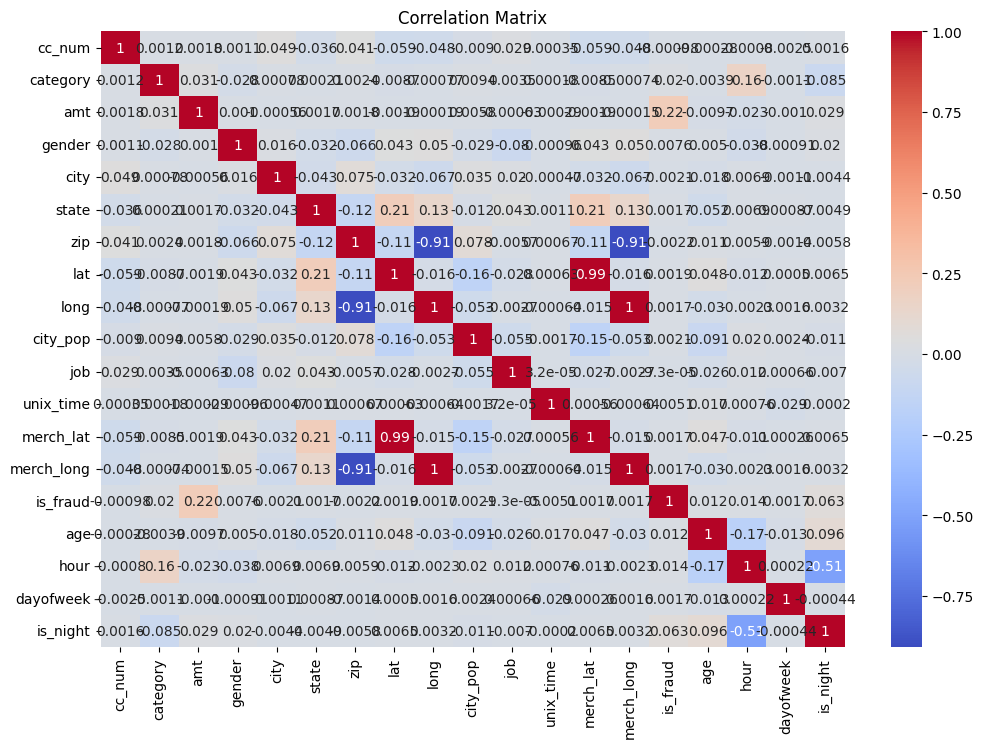

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

categorical = ['category', 'gender', 'state', 'job', 'city']
for col in categorical:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

for col in categorical:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])


In [17]:
X_train = data.drop(columns=['is_fraud','merchant', 'trans_date_trans_time', 'dob', 'first', 'last', 'street', 'zip'])  
y_train = data['is_fraud']

X_test = test_data.drop(columns=['is_fraud','merchant', 'trans_date_trans_time', 'dob', 'first', 'last', 'street', 'zip'])  
y_test = test_data['is_fraud']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb


In [19]:
rf = RandomForestClassifier(
    n_estimators=50,         # fewer trees
    max_depth=10,            # limit tree depth
    class_weight='balanced',
    random_state=42,
    verbose=1
)
rf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  4.7min


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                       random_state=42, verbose=1)

In [20]:
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    3.0s


              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.21      0.88      0.34      2145

    accuracy                           0.99    555719
   macro avg       0.61      0.93      0.67    555719
weighted avg       1.00      0.99      0.99    555719



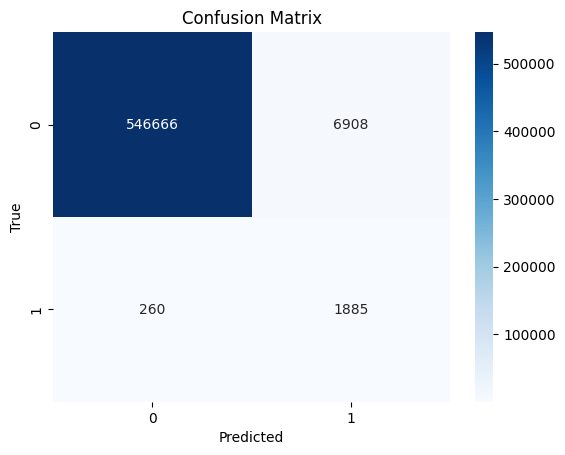

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()